# Speech Dataset

| **Dataset** 	| **Points** 	| **Dimensions** 	| **Outliers (%)** 	|
|:-----------:	|:----------:	|:--------------:	|:----------------:	|
|     Speech    	|     3686    	|       400       	|     61 (1.65%)    	|

## Dataset Information
The real-world speech dataset consists of **3686 segments** of English speech spoken with different accents. This dataset is provided by the **Speech Processing Group at Brno University of Technology**, Czech Republic.

- **Accent Distribution**:
  - The majority of the data corresponds to the **American accent**.
  - Only **1.65%** of the data corresponds to one of seven other accents (referred to as outliers).

- **Feature Representation**:
  - The speech segments are represented by **400-dimensional i-vectors**.
  - I-vectors are widely used state-of-the-art features for **speaker and language recognition**.

### Example Usage
Here is an example of how to load and explore this dataset:

In [1]:
# import libraries
import numpy as np

from openset.models import IRW_score, lof, mahalanobis, template
from openset.tools import dataset_tool, visualization_tool

In [2]:
X_train, X_test, y_train, y_test = dataset_tool.load_data(data_path='../data/speech.mat',
                                                          test_size=0.2,
                                                          random_state=42)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2948, 400), (2948, 1), (738, 400), (738, 1))

### GOOD ACCURACY

In [4]:
lof_y_pred_train_g, lof_y_score_train_g, lof_model_g = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 17,
                                      contamination = 'auto',
                                      leaf_size = 25,
                                      metric = "minkowski",
                                      p = 1)

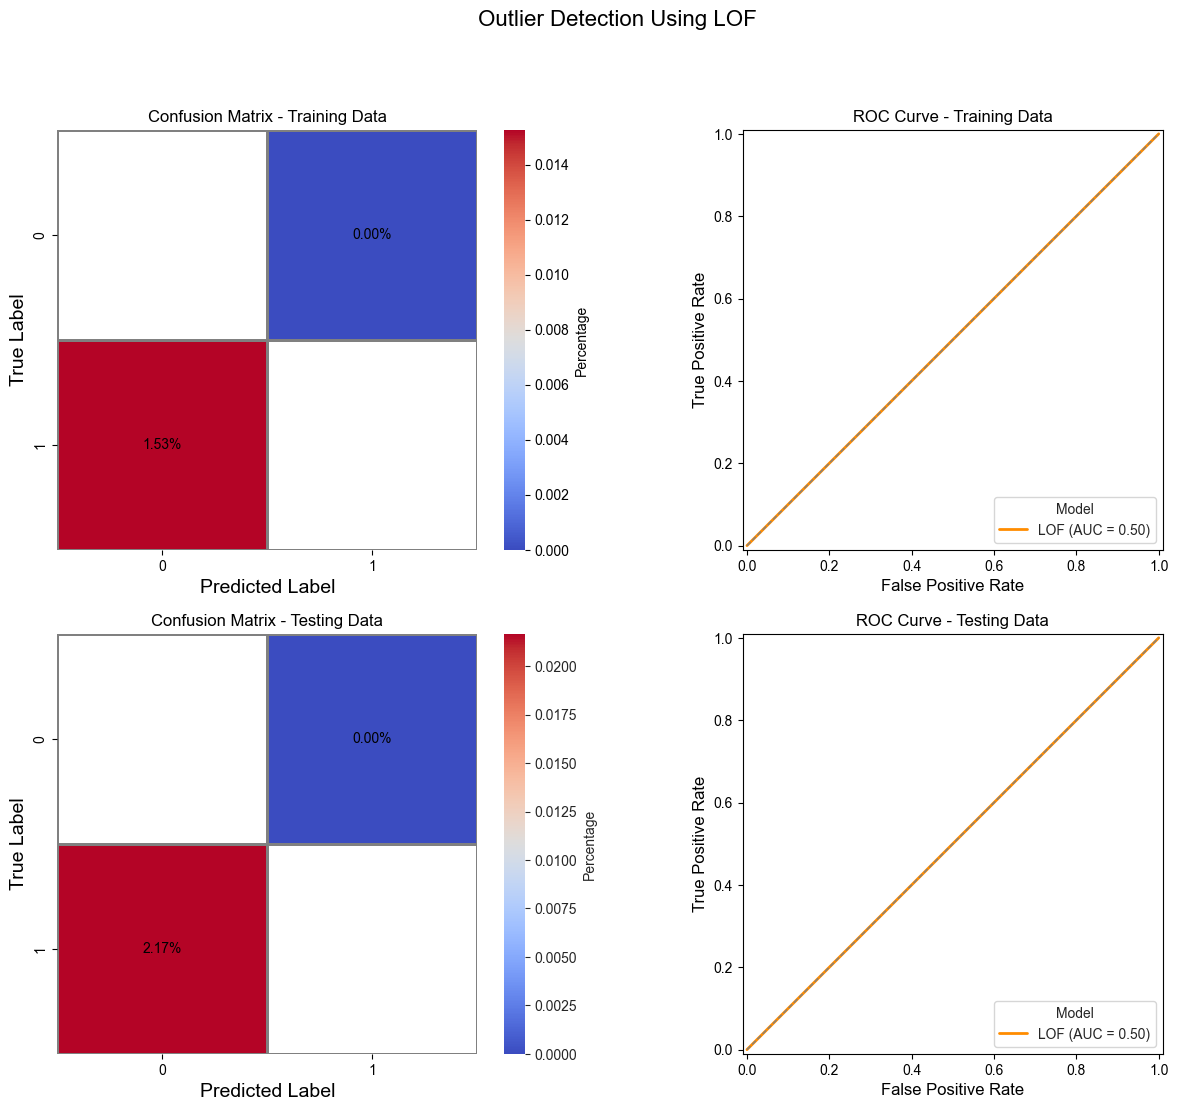

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [5]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test,
                           train_pred=None,
                           test_pred=None,
                           novelty=False,
                           n_neighbors=20,
                           contamination='auto',
                           leaf_size=25,
                           metric="minkowski", p=1)

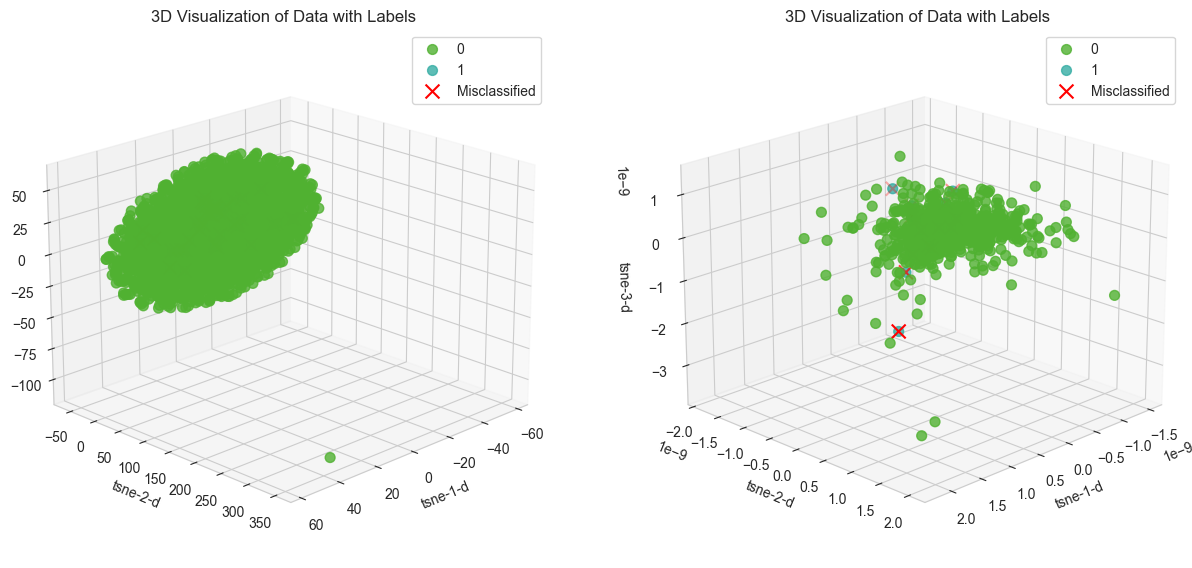

In [6]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, lof_model_g, lof_y_pred_train_g)

In [7]:
lof_y_pred_test_g, lof_y_score_test_g = lof.lof_predict_test(lof_model_g, X_train)

In [8]:
df_train = lof.lof_dataframe(y_train, lof_y_pred_train_g, lof_y_score_train_g)
df_test = lof.lof_dataframe(y_test, lof_y_pred_test_g, lof_y_score_test_g)

### Bad performance of the LOF algorithm on the speech dataset:

* **High-Dimensional Data**: The dataset consists of 400-dimensional i-vectors representing speech segments. High-dimensional data poses challenges for distance-based algorithms like LOF due to the curse of dimensionality. In high-dimensional spaces, the concept of distance becomes less meaningful, which can lead to poor performance of LOF.

* **Noise and Variability**: Speech data is inherently noisy and variable due to factors such as background noise, accent variations, and speaker characteristics. The presence of noise and variability in the data can make it challenging for outlier detection algorithms like LOF to accurately distinguish between normal and outlier points. The algorithm may incorrectly classify noisy or variable data points as outliers, leading to poor performance.

* **Algorithm Limitations**: While LOF is a widely used outlier detection algorithm, it has limitations and may not be suitable for all types of data. In particular, LOF may struggle with datasets containing high-dimensional, imbalanced, or noisy data, as observed in the speech dataset. It's important to consider alternative outlier detection algorithms that may better handle the characteristics of the dataset.

### Mahalanobis distance

In [9]:
inliers_amount, outliers_amount = np.unique(y_train, return_counts=True)[1]
contamination = outliers_amount / inliers_amount

In [10]:
mahalanobis_y_pred_train_g, mahalanobis_model_g = mahalanobis.detect_outliers(X_train,
                                                                              contamination = contamination,
                                                                              random_state=42)

/Users/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7712.599760310469719 > -7718.969202365758974). You may want to try with a higher value of support_fraction (current value: 0.569).
  warnings.warn(


/Users/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7712.599760310469719 > -7718.969202365758974). You may want to try with a higher value of support_fraction (current value: 0.569).
  warnings.warn(


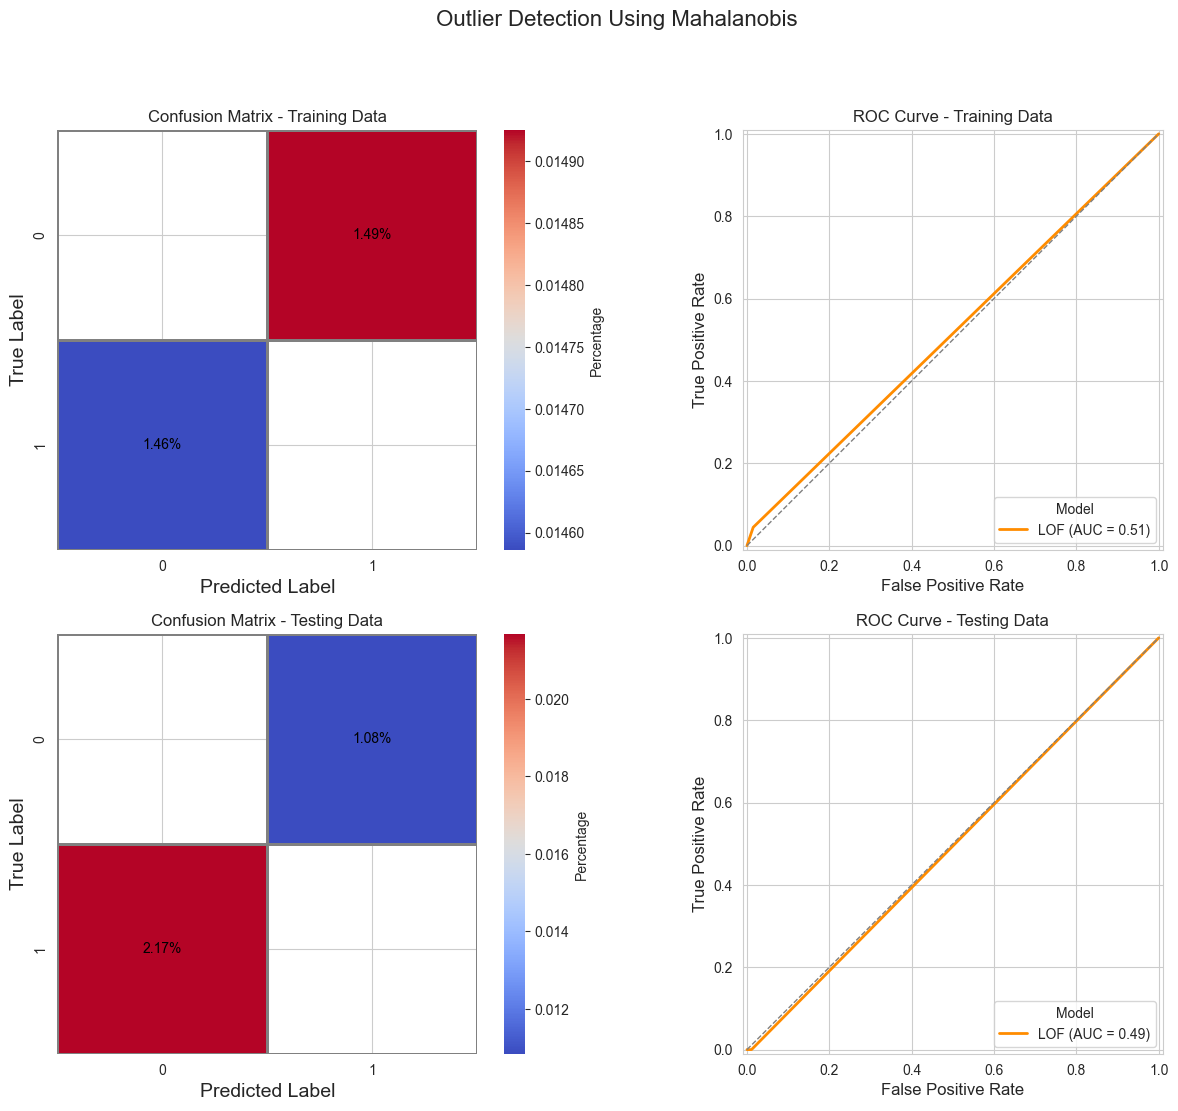

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [11]:
mahalanobis.visualize_outliers_mahalanobis(X_train,
                                           X_test,
                                           y_train,
                                           y_test,
                                           train_pred=None,
                                           test_pred=None,
                                           contamination=contamination,
                                           random_state=42)

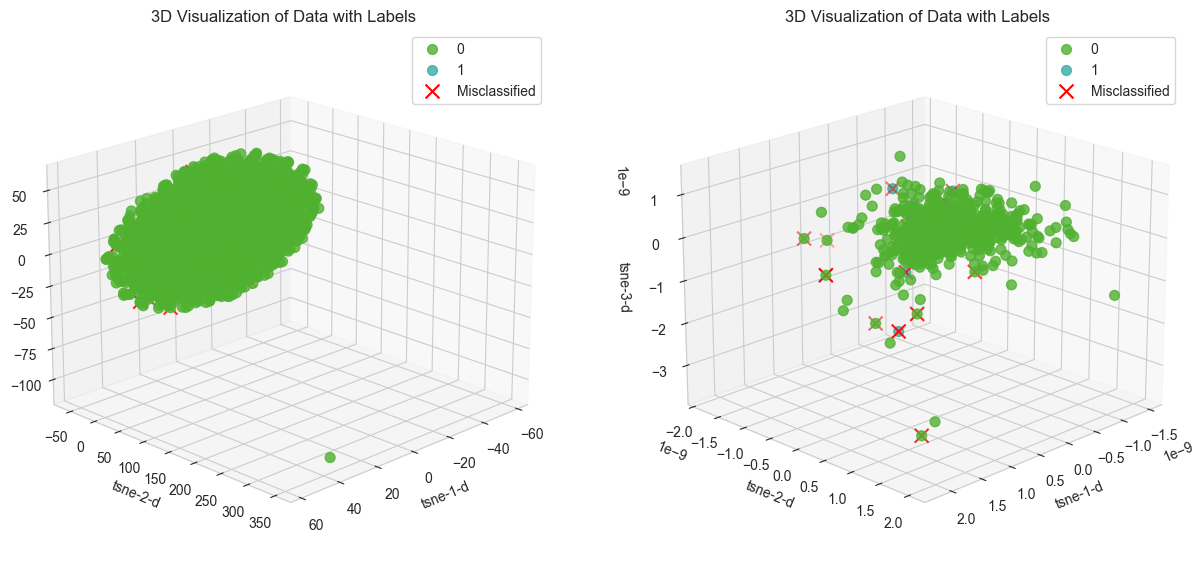

In [12]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, mahalanobis_model_g, mahalanobis_y_pred_train_g, lof=False)

In [13]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(mahalanobis_model_g,
                                                                     X_train,
                                                                     X_test,
                                                                     y_train)

/Users/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7712.599760310469719 > -7718.969202365758974). You may want to try with a higher value of support_fraction (current value: 0.569).
  warnings.warn(


Model fitting completed in 489.21 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


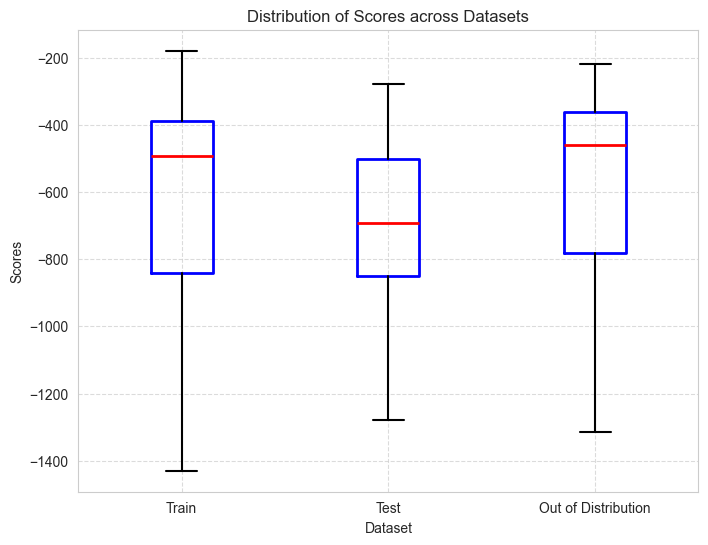

In [14]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

### The Mahalanobis distance-based method might perform better for several reasons:

* Handling High-Dimensional Data: Unlike LOF, Mahalanobis distance-based methods like Elliptic Envelope can effectively handle high-dimensional data. The Mahalanobis distance takes into account the covariance structure of the data, allowing it to account for correlations between different dimensions. This makes it more suitable for datasets with high-dimensional features, such as the 400-dimensional i-vectors in the speech dataset.

* Robustness to Outliers: The Elliptic Envelope algorithm assumes that the data is normally distributed and fits an elliptic envelope to the central data points, excluding outliers. By modeling the central data points using a robust covariance estimate, the algorithm is less sensitive to the presence of outliers compared to distance-based methods like LOF. This robustness to outliers can lead to better performance, especially in datasets with a small proportion of outliers, like the speech dataset where only 1.65% of the data corresponds to outliers.

* Parameter Independence: The Elliptic Envelope algorithm typically has fewer hyperparameters to tune compared to LOF, making it easier to use and less sensitive to parameter settings. This can be advantageous, especially if the dataset is complex or if there is limited domain knowledge available for parameter tuning.

* Separability of Out-of-Distribution (OOD) Data: One notable advantage of Mahalanobis distance-based methods is their ability to quantify the uncertainty or separability of out-of-distribution (OOD) data. Since the Mahalanobis distance measures the deviation of a data point from the central distribution of the data, points that are farther away from the central distribution are considered more likely to be outliers or OOD. This property allows the algorithm to provide scores or probabilities that indicate the degree of separability of OOD data from the in-distribution data, which can be useful for anomaly detection tasks.

### IRW

In [5]:
model_irw = IRW_score.IRWDepth(contamination=contamination)
model_irw.fit(X_train)

Fitted IRWDepth model with 1000 projections in 400 dimensions.


True

In [6]:
model_irw._threshold = 0.12

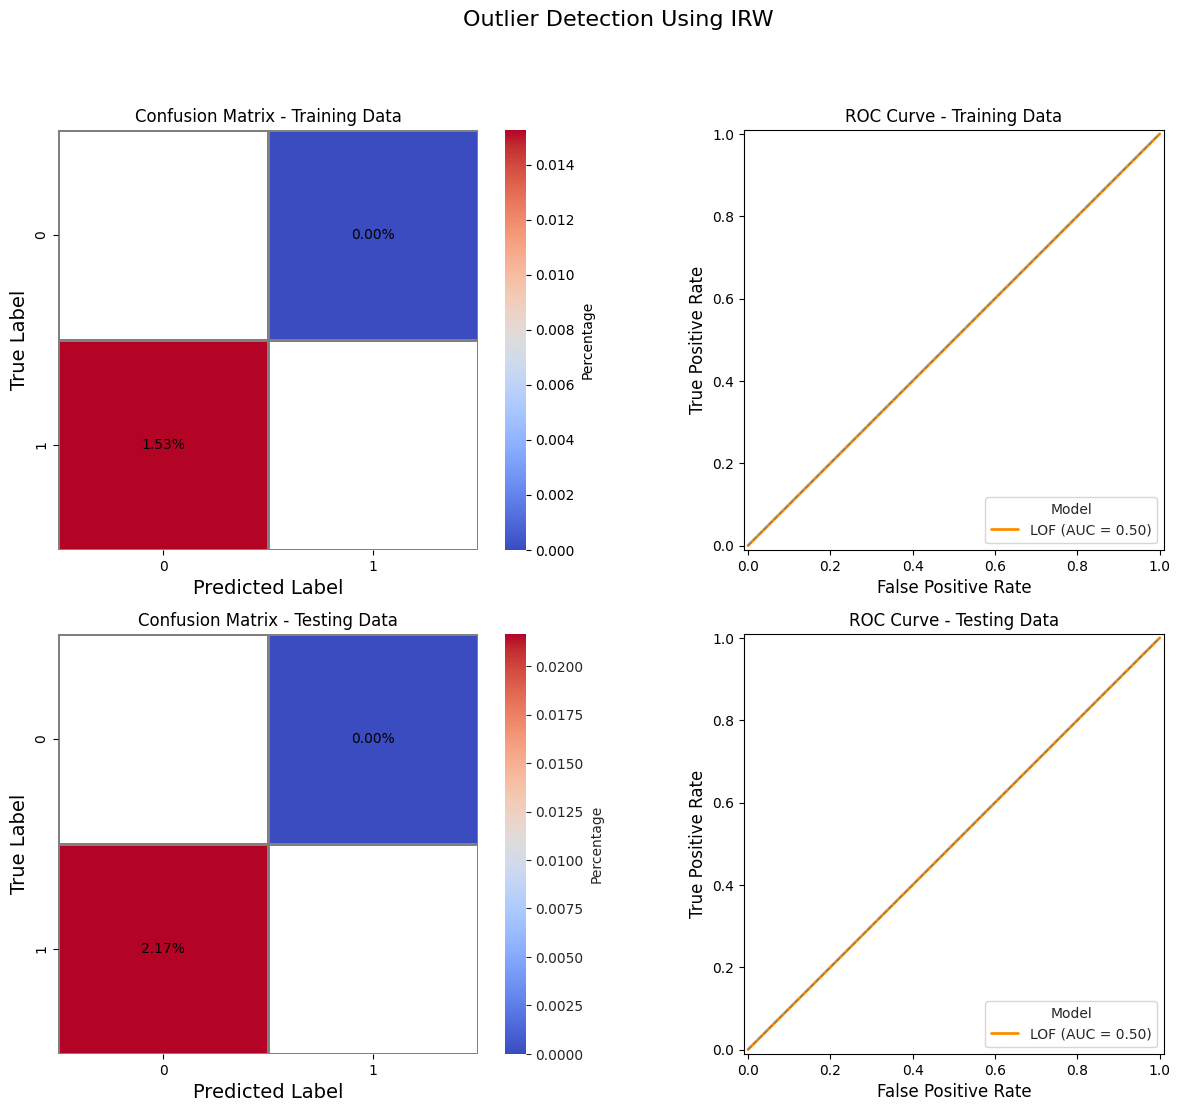

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [7]:
IRW_score.visualize_outliers_irw(X_train, X_test, y_train, y_test, model=model_irw)

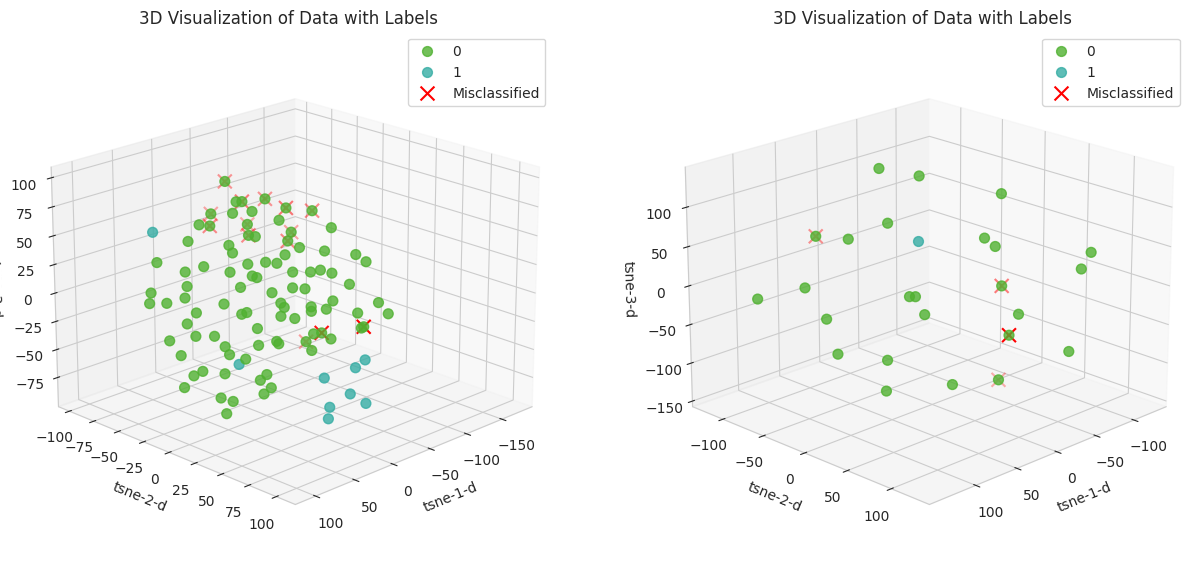

In [20]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, model_irw, model_irw.predict(X_train), lof=False, irw=True)

In [8]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(model_irw,
                                                                     X_train,
                                                                     X_test,
                                                                     y_train)

Fitted IRWDepth model with 1000 projections in 400 dimensions.
Model fitting completed in 0.05 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


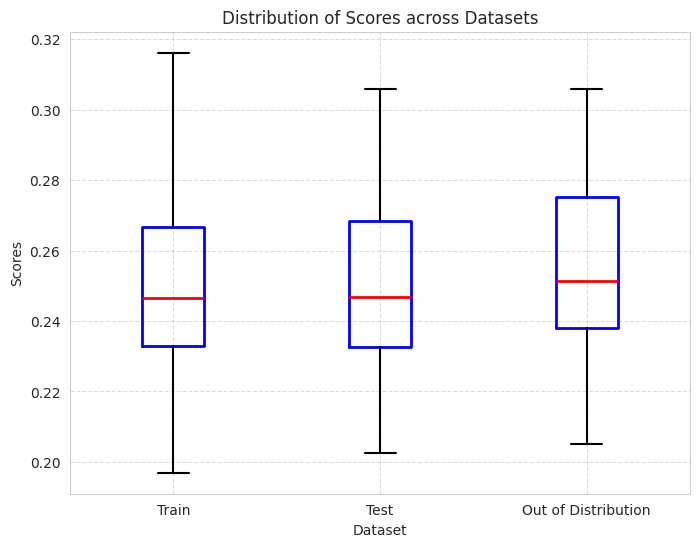

In [9]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

In conclusion, the poor performance of the Integrated Rank-Weighted depth algorithm on the speech dataset can be attributed to architectural mismatches, scalability challenges, inaccuracies introduced by the Monte Carlo approximation technique, inadequate parameter tuning, and limited generalization capabilities.